# Trabajo Práctico 2 - PSO

Alumno: Lucas Musciano

_(Nota: Este documento contiene redundancia de código con el fin de poder ejecutar las celdas por separado de forma autónoma. Además, algunos colores se modificaron ya que el autor del documento tiene baja visión)._


## Ejercicio 1

Maximizar con el algoritmo algoritmo Particle Swarm Optimization (PSO) la función:

$$ f(x) = 2\sin(x) - \frac{x^2}{2} $$

En el intervalo $0 \leq x \leq 4$

Cumpliendo con las siguientes consignas:
- Número de partículas: 2
- Máximo número de iteraciones: 80
- Coeficientes de aceleración: $ c1 = c2 = 2 $
- Peso de inercia: $ w = 0.7 $

2 particulas: x = 1.0300, f(x) = 1.1841
4 particulas: x = 1.0299, f(x) = 1.1841
10 particulas: x = 1.0299, f(x) = 1.1841
100 particulas: x = 1.0299, f(x) = 1.1841
200 particulas: x = 1.0299, f(x) = 1.1841
400 particulas: x = 1.0299, f(x) = 1.1841


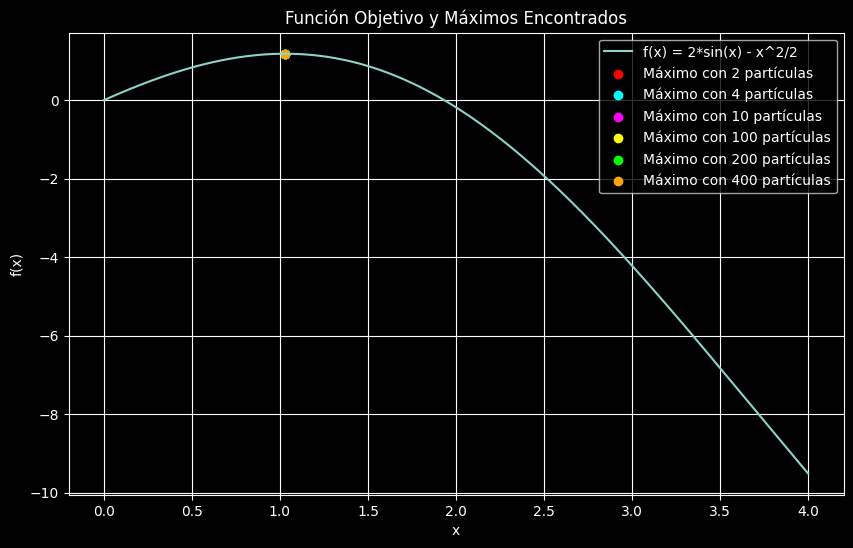

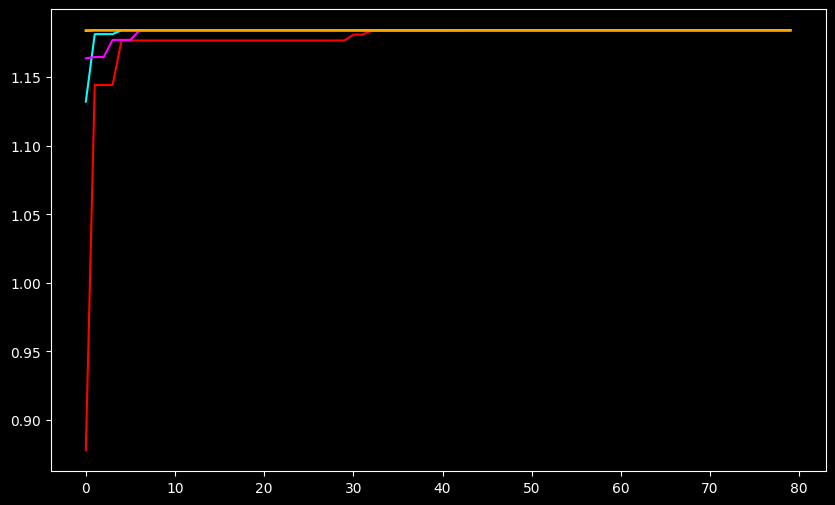

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Definición de la función objetivo
def objective_function(x):
    return 2 * np.sin(x) - (x**2) / 2

# Parámetros del PSO
max_iter = 80
c1 = 2
c2 = 2
w = 0.7
x_min = 0
x_max = 4

# Inicializar la lista de configuraciones de partículas
particles_configurations = [2, 4, 10, 100, 200, 400]

# Inicializar listas para almacenar los mejores puntos y las convergencias
best_points = []
convergence_histories = []

# Ejecutar PSO para cada configuración de partículas
for num_particles in particles_configurations:
    # Inicialización
    particles = np.random.uniform(x_min, x_max, num_particles)
    velocities = np.zeros(num_particles)
    pbest = particles.copy()
    pbest_values = objective_function(pbest)
    gbest = pbest[np.argmax(pbest_values)]
    gbest_value = max(pbest_values)
    gbest_history = []
    
    # Implementación de PSO
    for _ in range(max_iter):
        r1, r2 = np.random.rand(num_particles), np.random.rand(num_particles)
        velocities = w * velocities + c1 * r1 * (pbest - particles) + c2 * r2 * (gbest - particles)
        particles = np.clip(particles + velocities, x_min, x_max)
        fitness_values = objective_function(particles)
        better_mask = fitness_values > pbest_values
        pbest[better_mask] = particles[better_mask]
        pbest_values[better_mask] = fitness_values[better_mask]
        if max(fitness_values) > gbest_value:
            gbest = particles[np.argmax(fitness_values)]
            gbest_value = max(fitness_values)
        gbest_history.append(gbest_value)
    
    # Guardar el mejor punto encontrado y la convergencia
    best_points.append((gbest, gbest_value))
    convergence_histories.append((num_particles, gbest_history))

# Graficamos la función objetivo y los mejores puntos encontrados
x_values = np.linspace(x_min, x_max, 1000)
y_values = objective_function(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = 2*sin(x) - x^2/2')

colors = ['red', 'cyan', 'magenta', 'yellow', 'lime', 'orange']
for i, (x, y) in enumerate(best_points):
    print(f"{particles_configurations[i]} particulas: x = {x:.4f}, f(x) = {y:.4f}")
    plt.scatter(x, y, color=colors[i], label=f'Máximo con {particles_configurations[i]} partículas')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función Objetivo y Máximos Encontrados')
plt.legend()
plt.grid(True)
plt.show()

# Graficamos la convergencia de gbest para cada configuración
plt.figure(figsize=(10, 6))
for i, (num_particles, gbest_history) in enumerate(convergence_histories):
    plt.plot(gbest_history, color=colors[i], label=f'{num_particles} partículas')
plt.show()

## Ejercicio 2

Escribir algoritmo PSO para la función:

$$ y = \sin(x) + \sin(x^2) $$

en el intervalo $ 0 \leq x \leq 10$, cumpliendo con las siguientes consignas:
- Número de partículas: 2
- Máximo número de iteraciones: 30
- Coeficientes de aceleración: $ c1 = c2 = 1.49 $
- Peso de inercia: $w = 0.5$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')


# Definición de la función objetivo
def objective_function(x):
    return np.sin(x) + np.sin(x**2)

# Parámetros del PSO
num_particles = 2
max_iter = 30
c1 = 1.49
c2 = 1.49
w = 0.5
x_min = 0
x_max = 10

# Inicialización de partículas y velocidades
particles = np.random.uniform(x_min, x_max, num_particles)
velocities = np.zeros(num_particles)
pbest = particles.copy()
pbest_values = objective_function(pbest)
gbest = pbest[np.argmax(pbest_values)]
gbest_value = max(pbest_values)

# Algoritmo PSO
gbest_history = []
for _ in range(max_iter):
    r1, r2 = np.random.rand(num_particles), np.random.rand(num_particles)
    velocities = w * velocities + c1 * r1 * (pbest - particles) + c2 * r2 * (gbest - particles)
    particles = np.clip(particles + velocities, x_min, x_max)
    
    # Evaluación
    fitness_values = objective_function(particles)
    
    # Actualización de pbest y gbest
    better_mask = fitness_values > pbest_values
    pbest[better_mask] = particles[better_mask]
    pbest_values[better_mask] = fitness_values[better_mask]
    
    if max(fitness_values) > gbest_value:
        gbest = particles[np.argmax(fitness_values)]
        gbest_value = max(fitness_values)
    
    gbest_history.append(gbest_value)

gbest_solution = gbest
gbest_solution_value = gbest_value


In [3]:
print(f"x = {gbest_solution:.4f}")
print(f"f(x) = {gbest_solution_value:.4f}")

x = 2.7722
f(x) = 1.3468


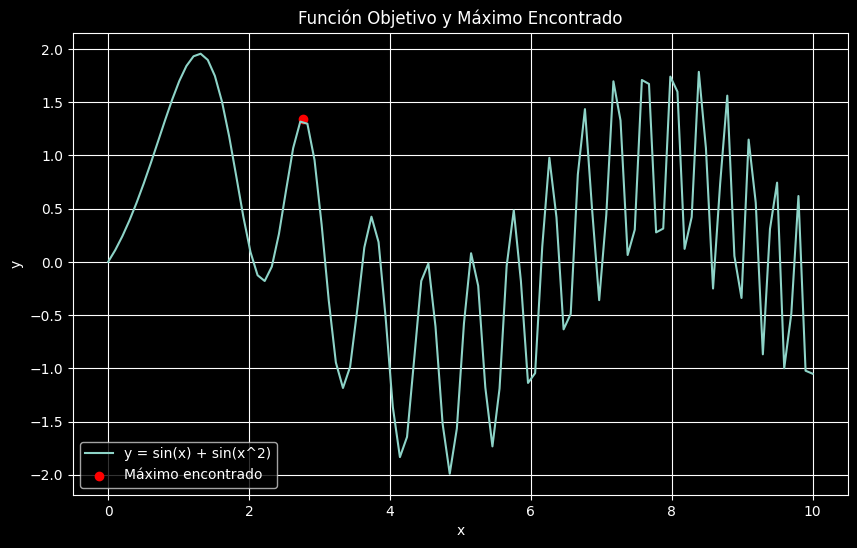

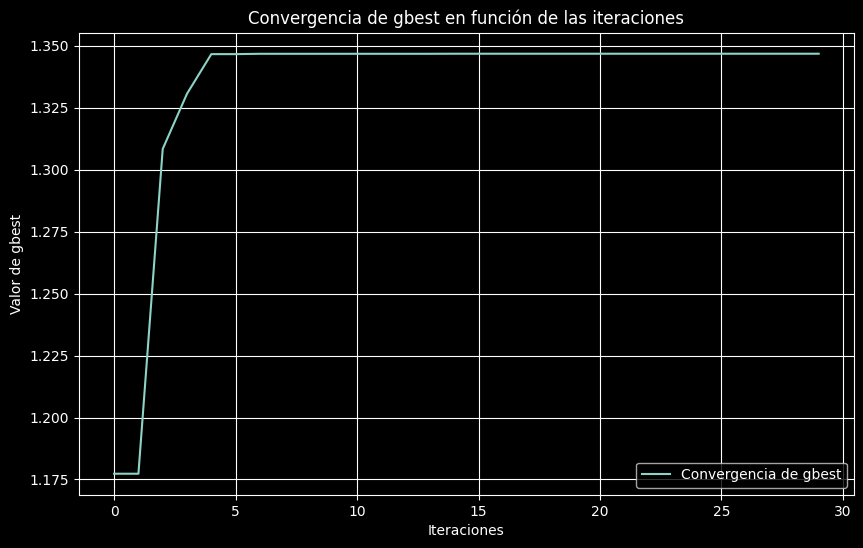

In [4]:
# Gráfico de la función objetivo
x_values = np.linspace(x_min, x_max, 100)
y_values = objective_function(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='y = sin(x) + sin(x^2)')
plt.scatter(gbest_solution, gbest_solution_value, color='red', label='Máximo encontrado')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Objetivo y Máximo Encontrado')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de la convergencia de gbest
plt.figure(figsize=(10, 6))
plt.plot(gbest_history, label='Convergencia de gbest')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Convergencia de gbest en función de las iteraciones')
plt.legend()
plt.grid(True)
plt.show()


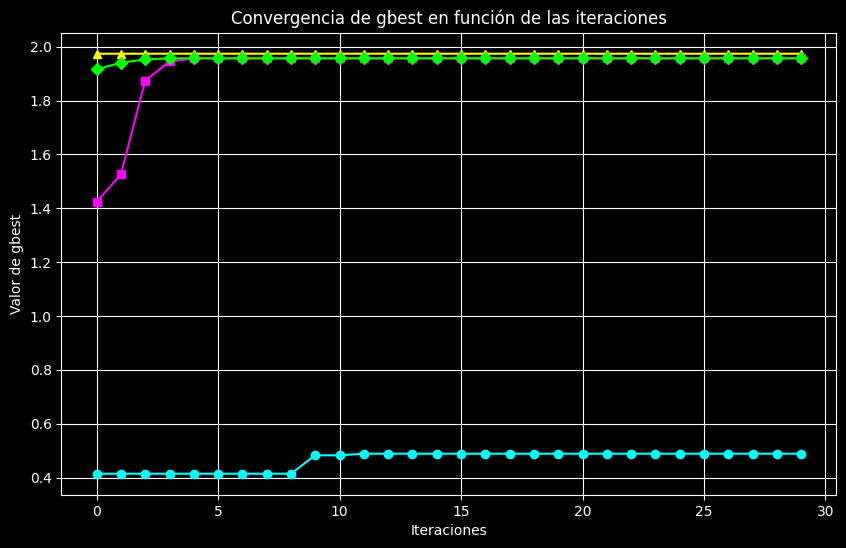

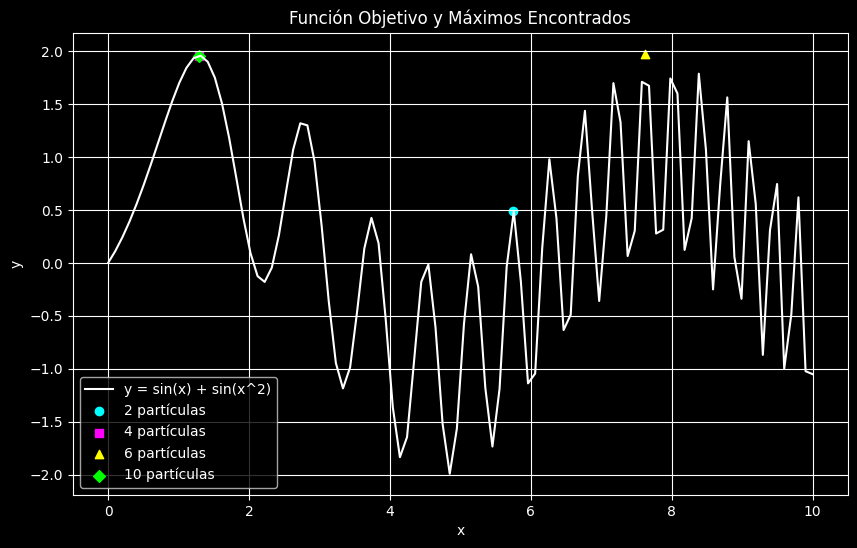

Solución con 2 partículas: x = 5.7499, y = 0.4889
Solución con 4 partículas: x = 1.2947, y = 1.9566
Solución con 6 partículas: x = 7.6246, y = 1.9737
Solución con 10 partículas: x = 1.2947, y = 1.9566


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para ejecutar el PSO
def run_pso(num_particles, max_iter=30, w=0.5, c1=1.49, c2=1.49):
    # Inicialización
    particles = np.random.uniform(x_min, x_max, num_particles)
    velocities = np.zeros(num_particles)
    pbest = particles.copy()
    pbest_values = objective_function(pbest)
    gbest = pbest[np.argmax(pbest_values)]
    gbest_value = max(pbest_values)
    gbest_history = []
    
    # Algoritmo PSO
    for _ in range(max_iter):
        r1, r2 = np.random.rand(num_particles), np.random.rand(num_particles)
        velocities = w * velocities + c1 * r1 * (pbest - particles) + c2 * r2 * (gbest - particles)
        particles = np.clip(particles + velocities, x_min, x_max)
        fitness_values = objective_function(particles)
        better_mask = fitness_values > pbest_values
        pbest[better_mask] = particles[better_mask]
        pbest_values[better_mask] = fitness_values[better_mask]
        if max(fitness_values) > gbest_value:
            gbest = particles[np.argmax(fitness_values)]
            gbest_value = max(fitness_values)
        gbest_history.append(gbest_value)
    
    return gbest, gbest_value, gbest_history

# Configuración de partículas a probar
particles_configurations = [2, 4, 6, 10]
results = []

# Inicialización de listas para los gráficos
colors = ['cyan', 'magenta', 'yellow', 'lime']
markers = ['o', 's', '^', 'D']

# Gráfico de la función objetivo
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='y = sin(x) + sin(x^2)', color='white')

# Gráfico de la convergencia de gbest
plt.figure(figsize=(10, 6))
plt.title('Convergencia de gbest en función de las iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.grid(True)

for i, num_particles in enumerate(particles_configurations):
    gbest, gbest_value, gbest_history = run_pso(num_particles)
    
    # Añadir punto del máximo encontrado en el gráfico de la función objetivo
    plt.figure(1)
    plt.scatter(gbest, gbest_value, color=colors[i], marker=markers[i], label=f'{num_particles} partículas')
    
    # Añadir línea de la convergencia de gbest
    plt.figure(2)
    plt.plot(gbest_history, label=f'{num_particles} partículas', color=colors[i], linestyle='-', marker=markers[i])
    
    results.append((num_particles, gbest, gbest_value))

# Mostrar gráfico de la función objetivo con los puntos de máximo
plt.figure(1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Objetivo y Máximos Encontrados')
plt.legend()
plt.grid(True)
plt.show()


# Mostrar todas las soluciones encontradas
for num_particles, gbest, gbest_value in results:
    print(f"Solución con {num_particles} partículas: x = {gbest:.4f}, y = {gbest_value:.4f}")


## Ejercicio 3

Dada la siguiente función de un paraboloide elíptico:

$$ f(x, y) = (x - a)^2 + (y + b)^2 $$

donde $ a $ y $ b $ son constantes ingresadas por el usuario, con los siguientes rangos:
- $ -100 \leq x \leq 100 $
- $ -100 \leq y \leq 100 $
- $ -50 \leq a \leq 50 $
- $ -50 \leq b \leq 50 $

Encontrar con PSO el mínimo de la función, cumpliendo con:
- Número de partículas: 20
- Máximo número de iteraciones: 10
- Coeficientes de aceleración: \( c1 = c2 = 2 \)
- Peso de inercia: \( w = 0.7 \)

Además, se realizarán gráficos y análisis de los resultados obtenidos, comparando el rendimiento del algoritmo con y sin la biblioteca `pyswarm`.

a = 10.0, b=10.0
x = [  7.74458383 -10.17508913]
f(x) = 5.1175583130941185


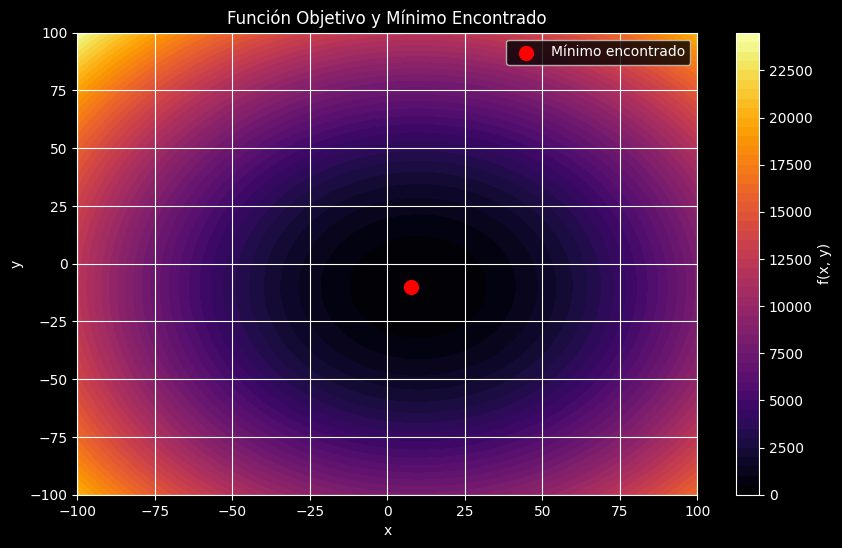

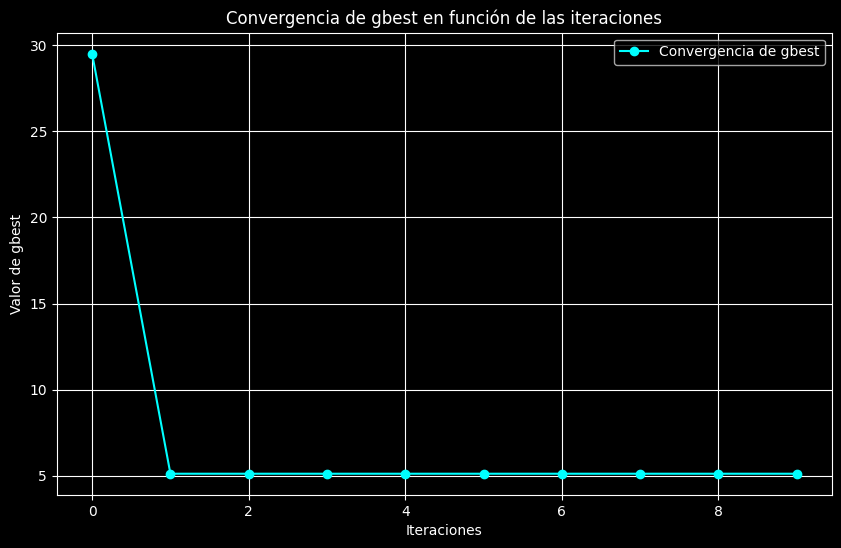

Solución óptima encontrada: x = 7.7446, y = -10.1751
Valor objetivo óptimo: f(x, y) = 5.1176


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función objetivo
def objective_function(x, y, a, b):
    return (x - a)**2 + (y + b)**2

# Parámetros del PSO
num_particles = 20
max_iter = 10
c1 = 2
c2 = 2
w = 0.7
x_min, x_max = -100, 100
y_min, y_max = -100, 100

# Valores de a y b ingresados por el usuario
a = float(input("Ingrese el valor de a (entre -50 y 50): "))
b = float(input("Ingrese el valor de b (entre -50 y 50): "))

# Inicialización de partículas y velocidades
particles = np.random.uniform([x_min, y_min], [x_max, y_max], (num_particles, 2))
velocities = np.zeros_like(particles)
pbest = particles.copy()
pbest_values = objective_function(particles[:, 0], particles[:, 1], a, b)
gbest = pbest[np.argmin(pbest_values)]
gbest_value = min(pbest_values)

# Algoritmo PSO
gbest_history = []
for _ in range(max_iter):
    r1, r2 = np.random.rand(num_particles, 2), np.random.rand(num_particles, 2)
    velocities = w * velocities + c1 * r1 * (pbest - particles) + c2 * r2 * (gbest - particles)
    particles = np.clip(particles + velocities, [x_min, y_min], [x_max, y_max])
    
    # Evaluación
    fitness_values = objective_function(particles[:, 0], particles[:, 1], a, b)
    
    # Actualización de pbest y gbest
    better_mask = fitness_values < pbest_values
    pbest[better_mask] = particles[better_mask]
    pbest_values[better_mask] = fitness_values[better_mask]
    
    if min(fitness_values) < gbest_value:
        gbest = particles[np.argmin(fitness_values)]
        gbest_value = min(fitness_values)
    
    gbest_history.append(gbest_value)

gbest_solution = gbest
gbest_solution_value = gbest_value

print(f"a = {a}, b={b}")
print(f"x = {gbest_solution}")
print(f"f(x) = {gbest_solution_value}")

# Crear una malla para graficar la función
x_vals = np.linspace(x_min, x_max, 100)
y_vals = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function(X, Y, a, b)

# Gráfico de la función objetivo con el mínimo encontrado
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=50, cmap='inferno')
plt.colorbar(label='f(x, y)')
plt.scatter(gbest_solution[0], gbest_solution[1], color='red', label='Mínimo encontrado', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Objetivo y Mínimo Encontrado')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de la convergencia de gbest
plt.figure(figsize=(10, 6))
plt.plot(gbest_history, color='cyan', marker='o', linestyle='-', label='Convergencia de gbest')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Convergencia de gbest en función de las iteraciones')
plt.legend()
plt.grid(True)
plt.show()

print(f"Solución óptima encontrada: x = {gbest_solution[0]:.4f}, y = {gbest_solution[1]:.4f}")
print(f"Valor objetivo óptimo: f(x, y) = {gbest_solution_value:.4f}")



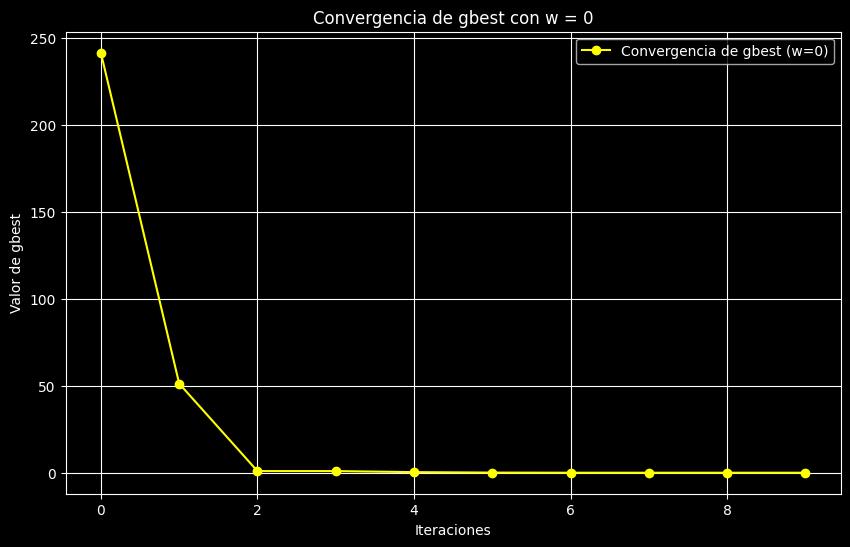

Solución óptima con w=0: x = 7.7446, y = -10.1751
Valor objetivo óptimo con w=0: f(x, y) = 5.1176


In [7]:
# Repetir el experimento con w = 0
w = 0
gbest_history_zero_inertia = []

# Re-inicializar partículas y velocidades
particles = np.random.uniform([x_min, y_min], [x_max, y_max], (num_particles, 2))
velocities = np.zeros_like(particles)
pbest = particles.copy()
pbest_values = objective_function(particles[:, 0], particles[:, 1], a, b)
gbest = pbest[np.argmin(pbest_values)]
gbest_value = min(pbest_values)

# Algoritmo PSO con w = 0
for _ in range(max_iter):
    r1, r2 = np.random.rand(num_particles, 2), np.random.rand(num_particles, 2)
    velocities = w * velocities + c1 * r1 * (pbest - particles) + c2 * r2 * (gbest - particles)
    particles = np.clip(particles + velocities, [x_min, y_min], [x_max, y_max])
    
    fitness_values = objective_function(particles[:, 0], particles[:, 1], a, b)
    better_mask = fitness_values < pbest_values
    pbest[better_mask] = particles[better_mask]
    pbest_values[better_mask] = fitness_values[better_mask]
    
    if min(fitness_values) < gbest_value:
        gbest = particles[np.argmin(fitness_values)]
        gbest_value = min(fitness_values)
    
    gbest_history_zero_inertia.append(gbest_value)

plt.figure(figsize=(10, 6))
plt.plot(gbest_history_zero_inertia, color='yellow', marker='o', linestyle='-', label='Convergencia de gbest (w=0)')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Convergencia de gbest con w = 0')
plt.legend()
plt.grid(True)
plt.show()

print(f"Solución óptima con w=0: x = {gbest_solution[0]:.4f}, y = {gbest_solution[1]:.4f}")
print(f"Valor objetivo óptimo con w=0: f(x, y) = {gbest_solution_value:.4f}")


## Ejercicio 4

Resolver con PSO de manera aproximada el sistema de ecuaciones:

$
\begin{cases}
3x_1 + 2x_2 = 9 \\
x_1 - 5x_2 = 4
\end{cases}
$

In [8]:
from pyswarm import pso

# Definición del sistema de ecuaciones
def equations(x):
    x1, x2 = x
    eq1 = 3*x1 + 2*x2 - 9
    eq2 = x1 - 5*x2 - 4
    return [eq1, eq2]

# Definición de la función objetivo
def objective_function(x):
    eqs = equations(x)
    return sum([eq**2 for eq in eqs])

# Parámetros del PSO
c1 = 2
c2 = 2
w = 0.7
num_particles = 20
max_iter = 100

# Límites de búsqueda
lb = [-10, -10]
ub = [10, 10]

# Ejecutar PSO
best_solution, best_value = pso(objective_function, lb, ub, swarmsize=num_particles, maxiter=max_iter, omega=w, phip=c1, phig=c2)

# Resultados
x1, x2 = best_solution
print(f"Solución encontrada: x1 = {x1:.4f}, x2 = {x2:.4f}")
print(f"Valor de la función objetivo (error cuadrático): {best_value:.4f}")


Stopping search: maximum iterations reached --> 100
Solución encontrada: x1 = 3.1176, x2 = -0.1765
Valor de la función objetivo (error cuadrático): 0.0000


### Conclusiones

Particle Swarm Optimization parece ser un algoritmo bastante potente ya que en los casos ensayados no pareció converger en máximos/mínimos locales, su proximidad al punto óptimo real es notable, y aunque su naturaleza de emulado físico puede ser computacionalmente demandante para problemas complejos, la convergencia en los ejercicios planteados se alcanza bastante antes del máximo de iteraciones planteadas, incluso para cantidades pequeñas de particulas. (Habría que determinar esto con problemas de mayor dimencionalidad con topografías más complejas, donde el azar de la inicialización juege papele más importantes).